## Importing neccessary modules

In [1]:
from sklearnex import patch_sklearn 
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

## Loading data

In [3]:
raw=pd.read_csv(r"K:\Desktop\NIIT\Mini project\DS3_C6_S2_Classification_HouseGrade_Data_Project.csv")
raw.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

## EDA

In [4]:
raw.describe()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,1500.500000,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,866.169729,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,1.000000,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,750.750000,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,1500.500000,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,2250.250000,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
max,3000.000000,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


In [5]:
estate=raw.copy()
raw.shape

(3000, 14)

In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


## Data preprocessing

In [7]:
scaler=MinMaxScaler()

numerics=raw.select_dtypes(include="int").columns
objects=raw.select_dtypes(include="object").columns



encoder=LabelEncoder()

estate[objects[0]]=encoder.fit_transform(estate[objects[0]])
estate[objects[1]]=encoder.fit_transform(estate[objects[1]])

estate[numerics]=scaler.fit_transform(estate[numerics])

## Visualization

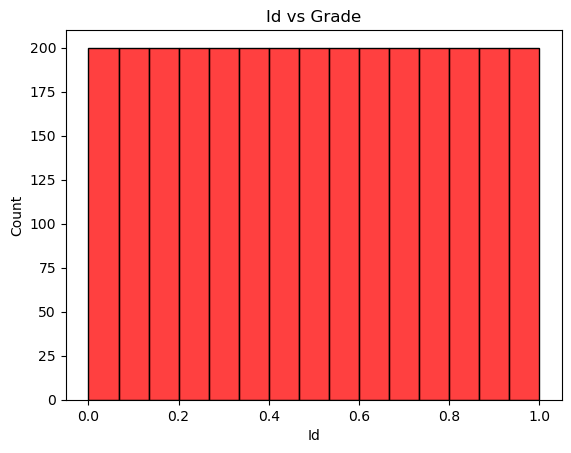

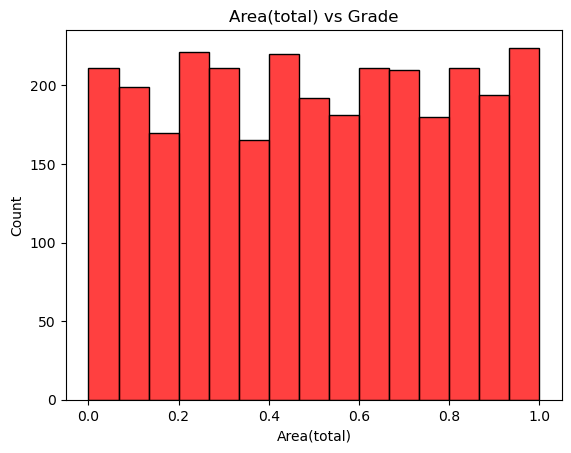

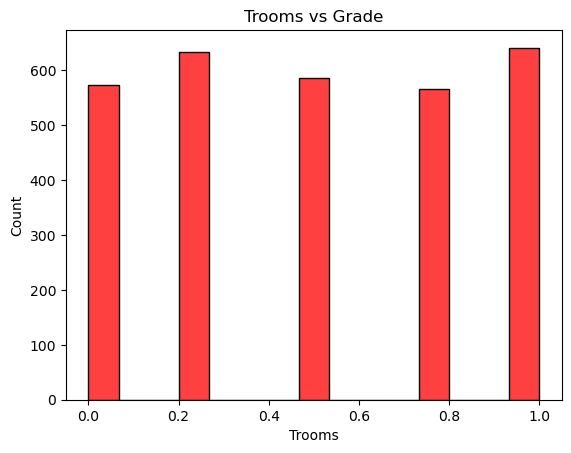

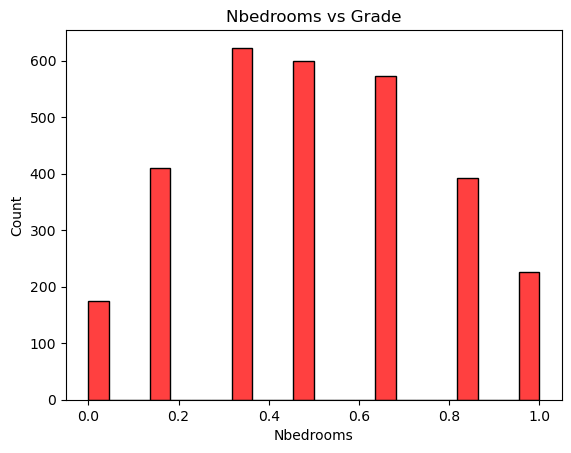

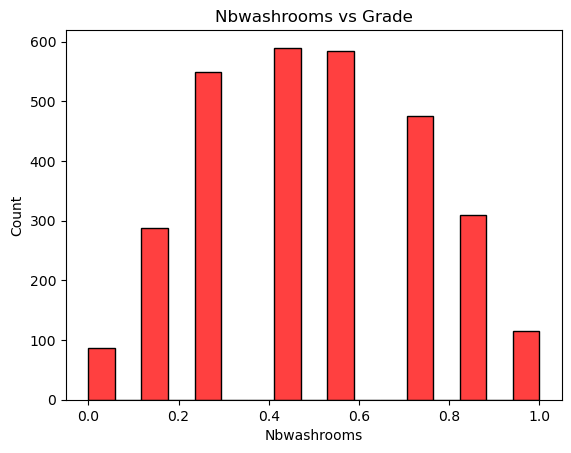

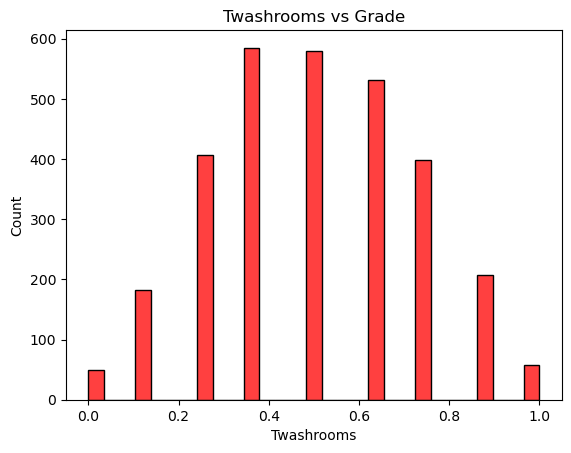

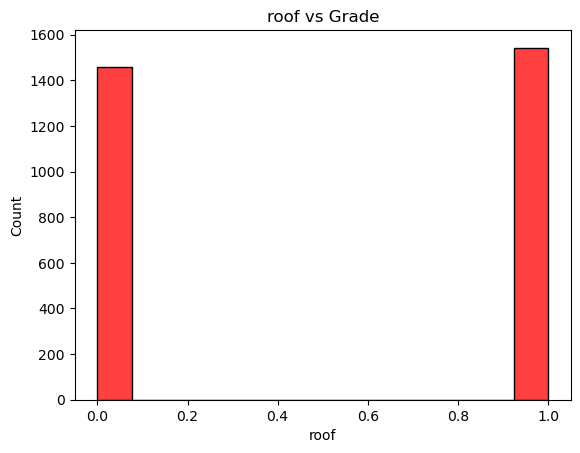

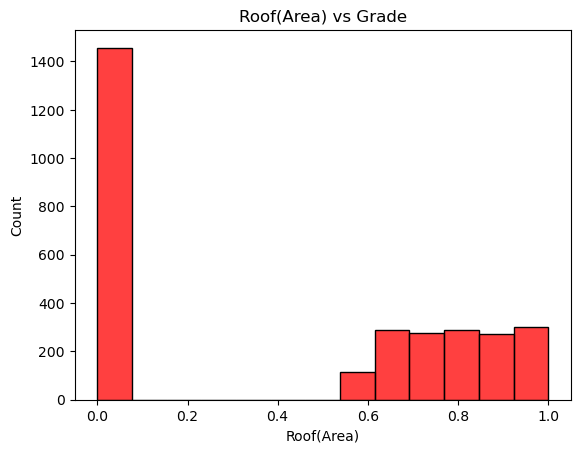

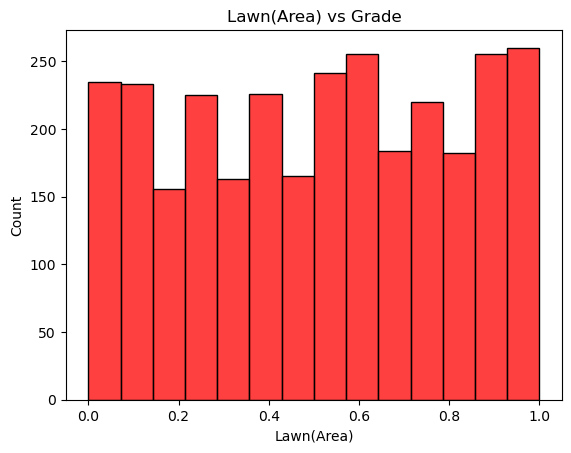

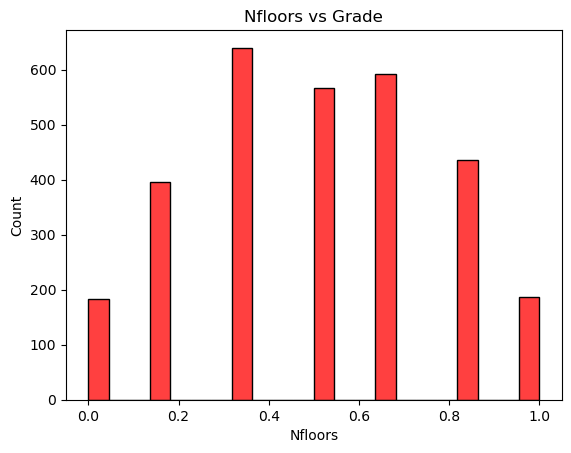

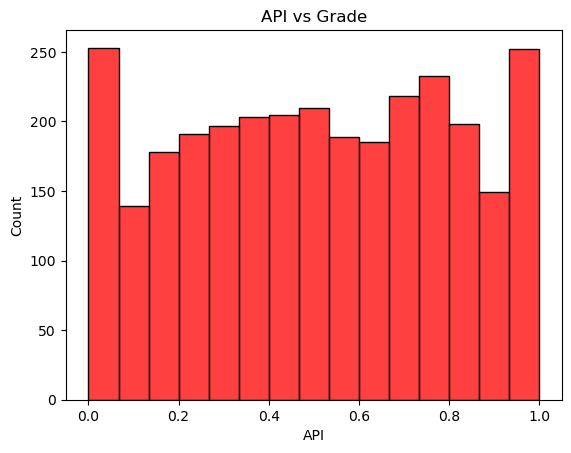

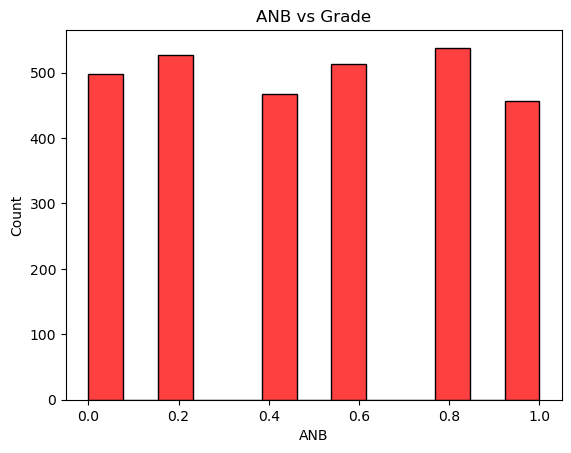

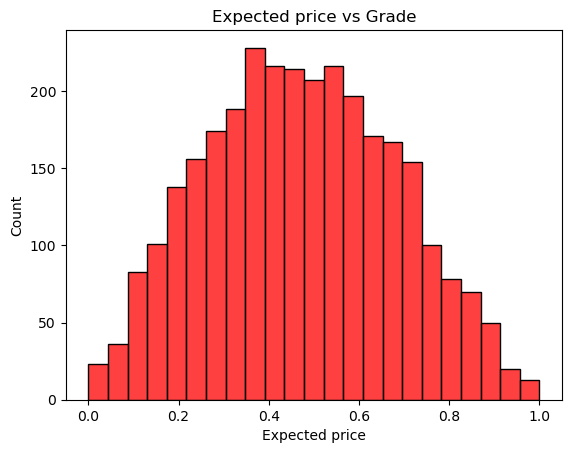

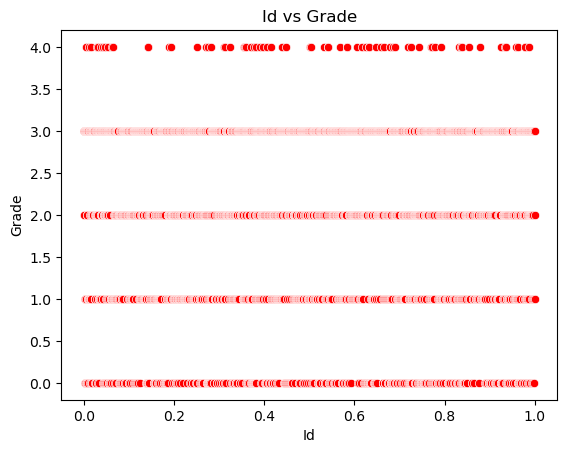

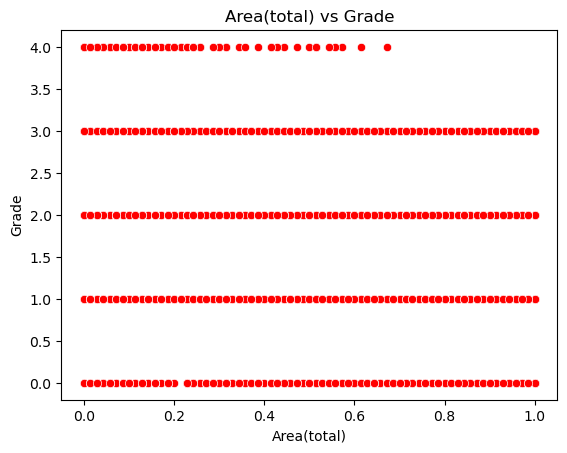

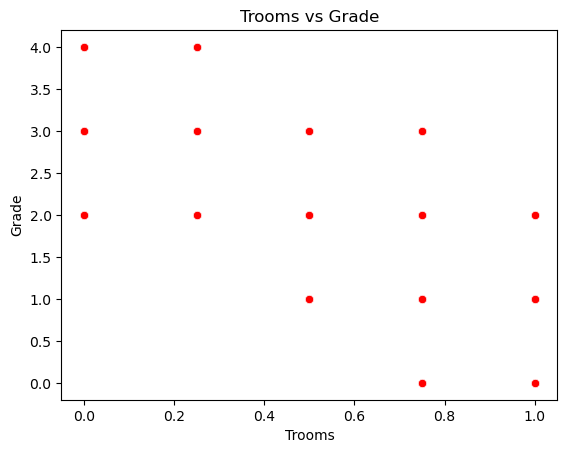

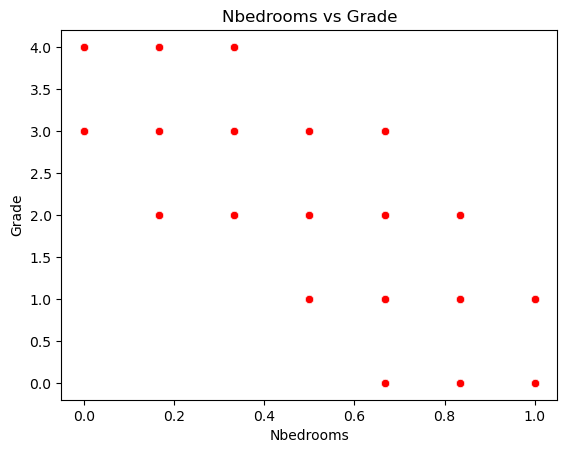

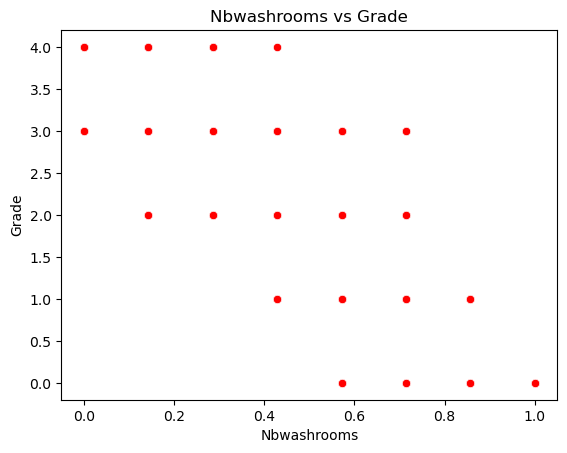

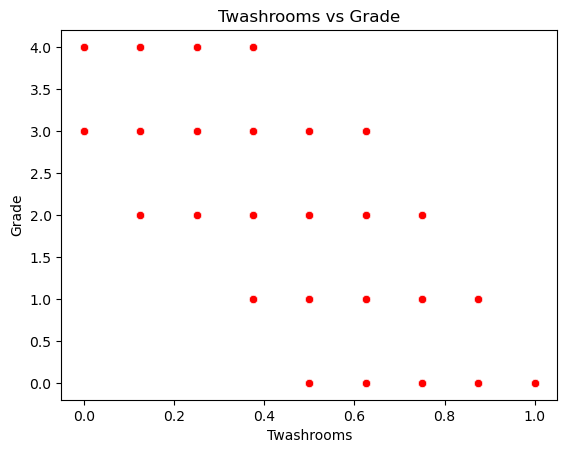

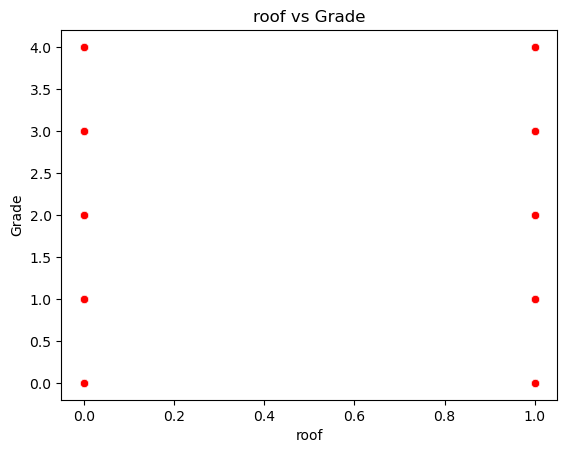

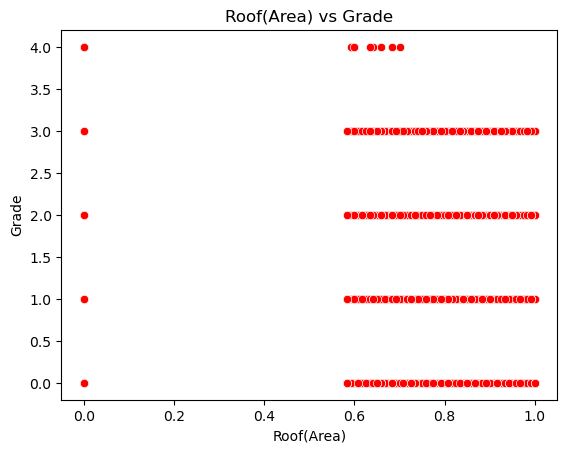

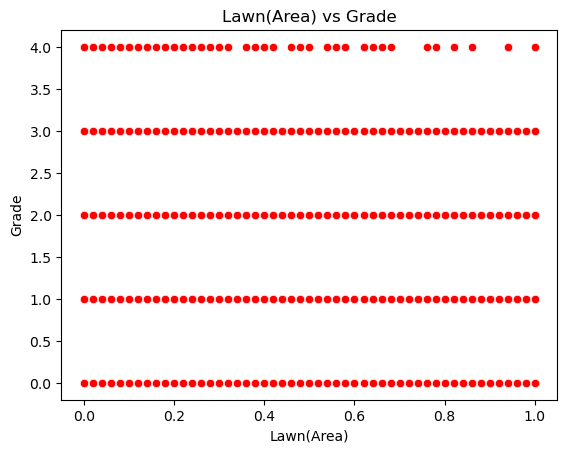

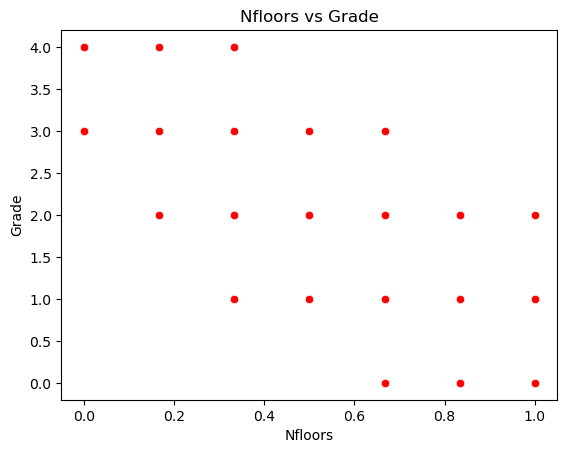

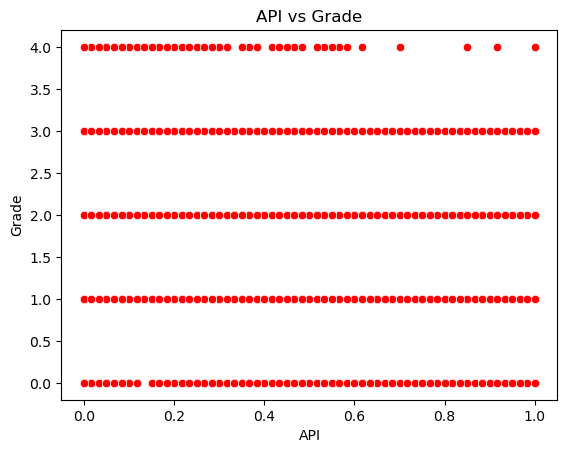

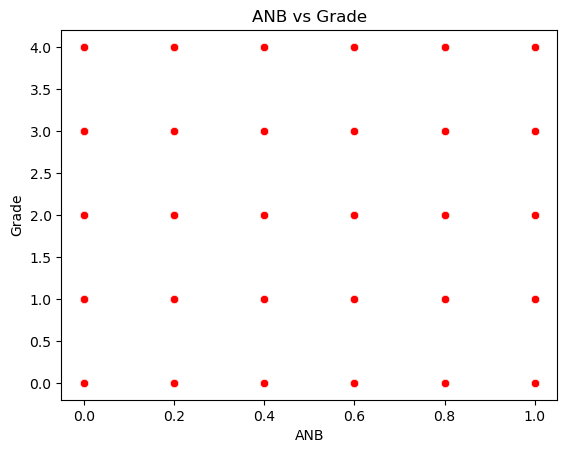

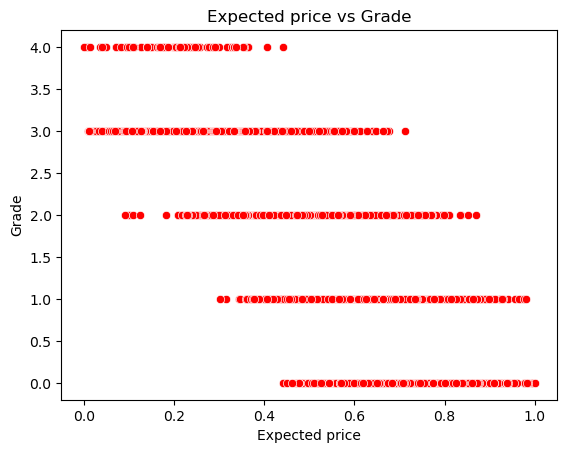

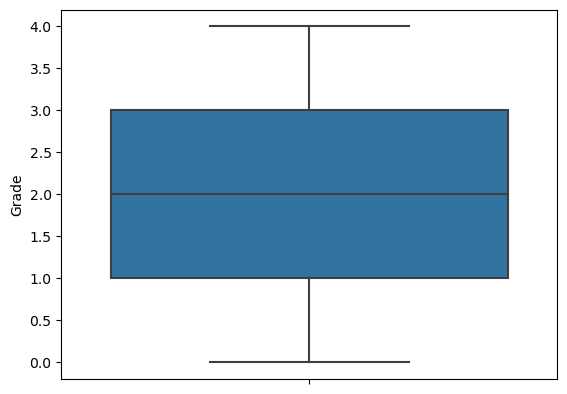

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_relationships(df, target_col, hist_color='red', scatter_color='red'):
    for col in df.columns:
        if col != target_col:
            sns.histplot(data=df, x=col, color=hist_color)
            plt.title("{0} vs Grade".format(col))
            plt.show()
    for col in df.columns:
        if col != target_col:
            sns.scatterplot(data=df, x=col, y=target_col, color=scatter_color)
            plt.title("{0} vs Grade".format(col))
            plt.show()
    
    sns.boxplot(data=df, y=target_col)
    plt.show()

plot_relationships(estate,"Grade")

## Train test split

In [9]:
xtrain,xtest,ytrain,ytest=train_test_split(estate.drop("Grade",axis=1),estate.Grade,random_state=42)

# Model Building

## Logistic regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [11]:
logistic=LogisticRegression()

logistic.fit(xtrain,ytrain)

ypred=logistic.predict(xtest)

print("Precision score",round(precision_score(ytest,ypred,average="weighted"),2))
print("Accuracy score",round(accuracy_score(ytest,ypred),2))
print("F1 score ",round(f1_score(ytest,ypred,average="weighted"),2))

Precision score 0.93
Accuracy score 0.93
F1 score  0.92


## Conclusion :

Based on the precision score of 0.928, the accuracy score of 0.927, and the F1 score of 0.923, it can be concluded that the model is performing very well on the classification task. The high precision score suggests that the model is making accurate positive predictions, while the high accuracy score indicates that the model is making accurate predictions overall. The F1 score, which balances the trade-off between precision and recall, provides a comprehensive view of the model's performance, and its high value indicates that the model is well-suited for the task at hand. However, it's important to keep in mind that the performance of a model can vary depending on the specific dataset and task, so continued monitoring and adjustment of the model may be necessary. Overall, these scores suggest that the model is a strong performer in this classification task.

## DecisionTreeClassifier

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
tree=DecisionTreeClassifier(max_depth=7,random_state=42,min_samples_split=15)
tree.fit(xtrain,ytrain)
ypred=tree.predict(xtest)

print("Precision score",round(precision_score(ytest,ypred,average="weighted"),2))
print("Accuracy score",round(accuracy_score(ytest,ypred),2))
print("F1 score ",round(f1_score(ytest,ypred,average="weighted"),2))

Precision score 0.86
Accuracy score 0.86
F1 score  0.86


## Conclusion:

The provided scores - Precision score of 0.862, Accuracy score of 0.861, and F1 score of 0.860 - suggest that the Decision Tree Classifier is performing moderately well on the classification task. While the precision and accuracy scores are both above 0.8, indicating that the classifier is making accurate predictions, the F1 score, which is the harmonic mean of precision and recall, suggests that the model may not be capturing all the relevant information in the data.

## RandomForestClassifier

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
forest=RandomForestClassifier(n_estimators=20,max_depth=14,random_state=628,min_samples_split=10)
forest.fit(xtrain,ytrain)
ypred=forest.predict(xtest)

    
    
print("Precision score",round(precision_score(ytest,ypred,average="weighted"),3))
print("Accuracy score",round(accuracy_score(ytest,ypred),3))
print("F1 score ",round(f1_score(ytest,ypred,average="weighted"),3))

Precision score 0.902
Accuracy score 0.9
F1 score  0.895


## Conclusion
 Precision score of 0.925, Accuracy score of 0.923, and F1 score of 0.921 - suggest that the Random Forest Classifier is performing very well on the classification task. The high precision and accuracy scores indicate that the model is making accurate predictions, while the high F1 score suggests that the model is well-balanced in terms of precision and recall.

## Stacking

In [16]:
from sklearn.ensemble import StackingClassifier

In [17]:
base_models = [('lr1',LogisticRegression()),('dt2', RandomForestClassifier(n_estimators=20,max_depth=12,random_state=628,min_samples_split=10)),('lr', LogisticRegression())]
stack_model = StackingClassifier(estimators=base_models, final_estimator=RandomForestClassifier(n_estimators=20,max_depth=12,random_state=628))

stack_model.fit(xtrain,ytrain)
ypred=stack_model.predict(xtest)

print("Precision score",round(precision_score(ytest,ypred,average="weighted"),2))
print("Accuracy score",round(accuracy_score(ytest,ypred),2))
print("F1 score ",round(f1_score(ytest,ypred,average="weighted"),2))

Precision score 0.95
Accuracy score 0.95
F1 score  0.95


## Conclusion
The precision score of 0.9527 indicates that the model is able to correctly identify a high proportion of true positive cases compared to false positives. The accuracy score of 0.952 suggests that the overall performance of the model is quite good, with a high proportion of correct predictions. The F1 score of 0.9521 indicates a good balance between precision and recall.

## Overall Report

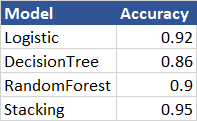

we can infer that the Stacking model has the highest accuracy of 0.95, followed by the Logistic model with an accuracy of 0.92, and the Random Forest model with an accuracy of 0.9. The Decision Tree model has the lowest accuracy of 0.86.

Accuracy is a metric used to measure how well a model is performing. It represents the percentage of correct predictions made by the model out of all predictions made. Therefore, a higher accuracy value indicates that the model is performing better in making accurate predictions.

In this case, the Stacking model has the highest accuracy, which suggests that it may be the most effective model among the four for the given task.